In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [54]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

model.add(Conv2D(32, (3, 3), dim_ordering="th"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'C:/Users/AKSHAY/1-Data_science/2-Deep_Learning/3-Web_scraping/images',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'C:/Users/AKSHAY/1-Data_science/2-Deep_Learning/3-Web_scraping/images',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

C:\Users\AKSHAY\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  
C:\Users\AKSHAY\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\AKSHAY\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  if sys.path[0] == '':
C:\Users\AKSHAY\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  app.launch_new_instance()


Found 512 images belonging to 3 classes.
Found 512 images belonging to 3 classes.


In [60]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save('first_try.h5')
print("Saved model to disk")

Epoch 1/20
125/125 [==============================] - 68s 543ms/step - loss: 0.5944 - accuracy: 0.7510 - val_loss: 0.3384 - val_accuracy: 0.8388
Epoch 2/20
125/125 [==============================] - 68s 545ms/step - loss: 0.5065 - accuracy: 0.7850 - val_loss: 0.4144 - val_accuracy: 0.8888
Epoch 3/20
125/125 [==============================] - 68s 542ms/step - loss: 0.4003 - accuracy: 0.8340 - val_loss: 0.3073 - val_accuracy: 0.8838
Epoch 4/20
125/125 [==============================] - 67s 538ms/step - loss: 0.3965 - accuracy: 0.8385 - val_loss: 0.4127 - val_accuracy: 0.9038
Epoch 5/20
125/125 [==============================] - 71s 569ms/step - loss: 0.3540 - accuracy: 0.8600 - val_loss: 0.1551 - val_accuracy: 0.8988
Epoch 6/20
125/125 [==============================] - 72s 578ms/step - loss: 0.3222 - accuracy: 0.8705 - val_loss: 0.2399 - val_accuracy: 0.9112
Epoch 7/20
125/125 [==============================] - 69s 553ms/step - loss: 0.3091 - accuracy: 0.8770 - val_loss: 0.3704 - val_ac

In [61]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_33 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 148, 74, 16)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 72, 14)        42656     
_________________________________________________________________
activation_34 (Activation)   (None, 32, 72, 14)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 36, 7)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 34, 64)      

In [62]:
model.history

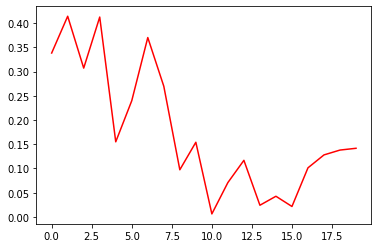

In [63]:
plt.plot(model.history.history['val_loss'], 'r')

In [64]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/AKSHAY/1-Data_science/2-Deep_Learning/3-Web_scraping/images/tshirt1.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices        
if result[0][0] == 1:
    prediction = 'saree'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Tshirt'
    print(prediction)
else:
    prediction = 'Shirt'
    print(prediction)

Tshirt
